### 1040 모델 ()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

In [2]:
d1 = pd.read_csv("LOT1_20210621101900.csv")
d2 = pd.read_csv("LOT1_20210621193812.csv")
d3 = pd.read_csv("LOT1_20210622062144.csv")
d4 = pd.read_csv("LOT1_20210622214526.csv")
d5 = pd.read_csv("LOT1_20210623075331.csv")
d6 = pd.read_csv("LOT1_20210624074608.csv")
d7 = pd.read_csv("LOT1_20210625055859.csv")
d8 = pd.read_csv("LOT1_20210626055656.csv")

In [3]:
df = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8])
df.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Frequency,...,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 25,[SEQ2] F0 Vibration Rank1,[SEQ4] RisingTime,[SEQ4] FallingTime,Unnamed: 26
0,1,CH1,160.4,1.17,0.8,2.3,0.0,5.2,30.3,172.1,...,NaN,2021-06-21 10:20:20,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CH2,163.8,1.25,1.3,2.0,0.0,4.8,24.7,169.1,...,NaN,2021-06-21 10:20:22,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,CH3,160.2,1.13,6.8,2.4,0.0,3.8,17.2,170.1,...,NaN,2021-06-21 10:20:24,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,CH4,163.9,1.24,3.2,1.9,0.0,4.3,31.5,171.2,...,NaN,2021-06-21 10:20:27,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,CH5,164.6,1.26,9.4,1.5,1.8,4.8,26.5,172.0,...,NaN,2021-06-21 10:20:29,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26', 'Unnamed: 25'], axis=1)

In [5]:
df = df.drop(['MODEL'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63613 entries, 0 to 6743
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NUM                         63613 non-null  int64  
 1   CH                          63613 non-null  object 
 2   [SEQ1]  F0 Current          63613 non-null  float64
 3   [SEQ1]  F0 Vibration        63613 non-null  float64
 4   [SEQ1]  Noise Touch         63613 non-null  float64
 5   [SEQ1]  Noise THD1          63613 non-null  float64
 6   [SEQ1]  Noise Band1         63613 non-null  float64
 7   [SEQ1]  RisingTime          53177 non-null  float64
 8   [SEQ1]  FallingTime         53177 non-null  float64
 9   [SEQ2]  F0 Frequency        63613 non-null  float64
 10  [SEQ2]  F0 Vibration        63613 non-null  float64
 11  [SEQ2]  Noise Touch         63613 non-null  float64
 12  [SEQ2]  Noise THD1          63613 non-null  float64
 13  [SEQ2]  Noise Band2         6361

In [7]:
df.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Frequency,...,[SEQ3] F0 Vibration,[SEQ3] Noise Touch,[SEQ3] Noise THD1,[SEQ3] Noise Band1,[SEQ5] F0 Vibration,PASS/FAIL,DATE,[SEQ2] F0 Vibration Rank1,[SEQ4] RisingTime,[SEQ4] FallingTime
0,1,CH1,160.4,1.17,0.8,2.3,0.0,5.2,30.3,172.1,...,1.40,6.3,100.0,40.9,1.35,FAIL,2021-06-21 10:20:20,NaN,NaN,NaN
1,1,CH2,163.8,1.25,1.3,2.0,0.0,4.8,24.7,169.1,...,1.51,6.7,0.4,0.0,1.42,PASS,2021-06-21 10:20:22,NaN,NaN,NaN
2,1,CH3,160.2,1.13,6.8,2.4,0.0,3.8,17.2,170.1,...,1.18,2.2,0.2,0.0,1.17,PASS,2021-06-21 10:20:24,NaN,NaN,NaN
3,1,CH4,163.9,1.24,3.2,1.9,0.0,4.3,31.5,171.2,...,1.26,5.4,0.3,0.0,1.42,PASS,2021-06-21 10:20:27,NaN,NaN,NaN
4,1,CH5,164.6,1.26,9.4,1.5,1.8,4.8,26.5,172.0,...,1.19,4.9,0.3,0.0,1.47,PASS,2021-06-21 10:20:29,NaN,NaN,NaN


In [8]:
df.tail()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Frequency,...,[SEQ3] F0 Vibration,[SEQ3] Noise Touch,[SEQ3] Noise THD1,[SEQ3] Noise Band1,[SEQ5] F0 Vibration,PASS/FAIL,DATE,[SEQ2] F0 Vibration Rank1,[SEQ4] RisingTime,[SEQ4] FallingTime
6739,1685,CH4,158.8,1.30,10.1,4.5,2.2,4.6,21.5,165.8,...,1.23,0.2,0.1,0.0,1.18,PASS,2021-06-26 16:19:43,NaN,NaN,NaN
6740,1685,CH5,167.7,1.13,0.2,1.8,0.2,4.2,25.7,173.5,...,1.54,11.1,0.9,2.3,1.3,PASS,2021-06-26 16:19:46,NaN,NaN,NaN
6741,1687,CH1,167.5,1.11,3.3,1.9,0.0,3.5,25.5,173.7,...,1.45,0.5,0.6,0.0,1.31,PASS,2021-06-26 16:19:55,NaN,NaN,NaN
6742,1686,CH2,166.3,1.14,1.6,1.5,0.0,4.7,27.1,174.1,...,1.59,0.0,0.2,0.0,1.31,PASS,2021-06-26 16:19:58,NaN,NaN,NaN
6743,1686,CH4,164.3,1.12,5.7,1.3,0.0,4.1,20.6,173.0,...,1.53,3.2,0.1,0.0,1.18,PASS,2021-06-26 16:20:01,NaN,NaN,NaN


### [SEQ1], [SEQ2] 소비전류.주파수.진동값에 대한 상관성

##### 검사 항목 중 noise관련 부분은 실제 정규성을 띄지 않는것으로 보여 제외한다.

#### 1. SEQ1

In [9]:
SEQ1_df = df[['[SEQ1]  F0 Current', '[SEQ1]  F0 Vibration', '[SEQ1]  RisingTime', '[SEQ1]  FallingTime']]

In [10]:
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Current'], y = SEQ1_df['[SEQ1]  F0 Vibration'])

(0.5482799994986292, 0.0)

In [10]:
SEQ1_df = df[['[SEQ1]  F0 Current', '[SEQ1]  F0 Vibration', '[SEQ1]  RisingTime', '[SEQ1]  FallingTime']]

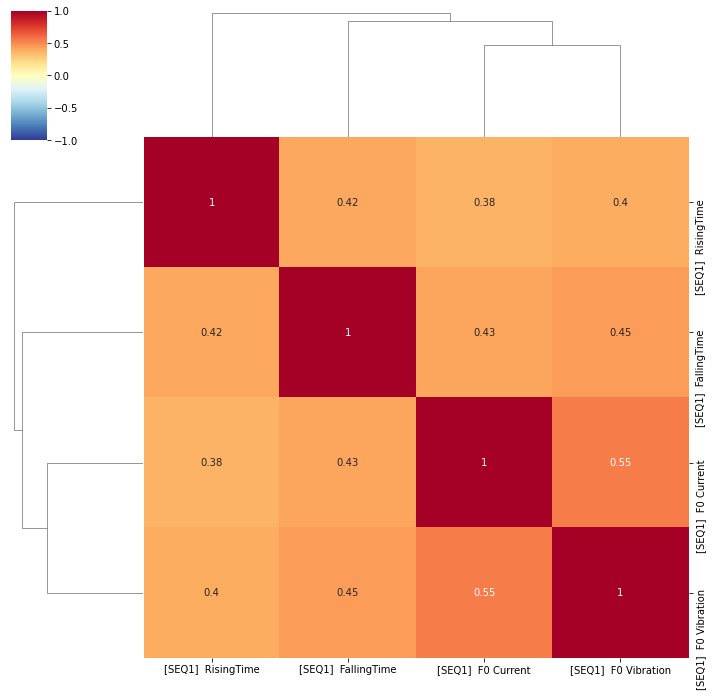

In [11]:
data = SEQ1_df.corr()

sns.clustermap(data, 
               annot = True,      
               cmap = 'RdYlBu_r', 
               vmin = -1, vmax = 1, 
              )

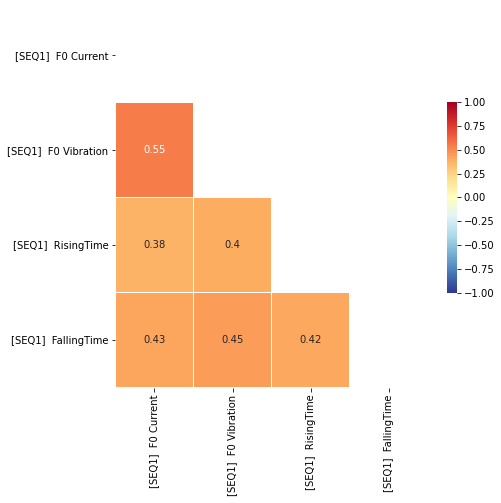

In [55]:
data = SEQ1_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### [SEQ1]  F0 Vibration과 Current의 상관계수 : 0.55 (양의 상관관계)

##### 진동값과 전류와의 상관 관계는 비교적 강한 상관관계가 있다고 할 수 있다.

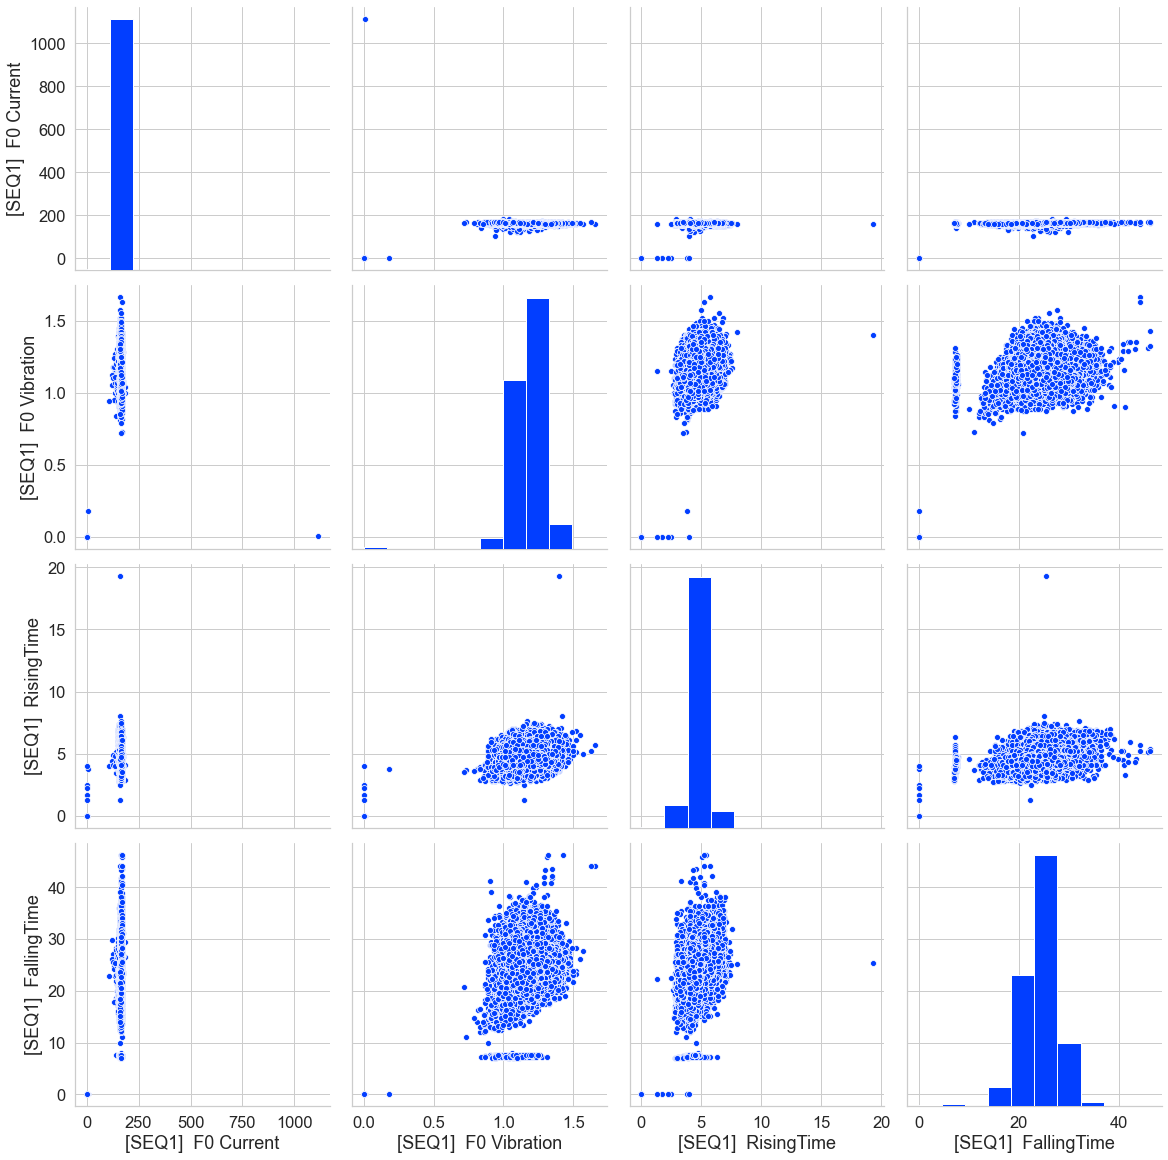

In [56]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ1_df, height=4)

#### 2. SEQ2

In [14]:
X = df['[SEQ2]  F0 Frequency']
Y = df['[SEQ2]  F0 Vibration']

In [65]:
cov = (np.sum(X*Y) - len(X)*np.mean(X)*np.mean(Y)) / len(X)
cov

-503.690959544348

In [66]:
corr = cov / (np.std(X) * np.std(Y))
corr

-0.9645490632468748

In [15]:
stats.pearsonr(x = X, y = Y)

(-0.9645490632468676, 0.0)

##### 주파수와 진동값의 상관관계는 -0.96으로, 매우 강한 음의 상관관계를 띤다고 할 수 있다.
##### 또한, p값이 0.0이므로 통계적으로 유의미하다고 할 수 있다.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63613 entries, 0 to 6743
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NUM                         63613 non-null  int64  
 1   CH                          63613 non-null  object 
 2   [SEQ1]  F0 Current          63613 non-null  float64
 3   [SEQ1]  F0 Vibration        63613 non-null  float64
 4   [SEQ1]  Noise Touch         63613 non-null  float64
 5   [SEQ1]  Noise THD1          63613 non-null  float64
 6   [SEQ1]  Noise Band1         63613 non-null  float64
 7   [SEQ1]  RisingTime          53177 non-null  float64
 8   [SEQ1]  FallingTime         53177 non-null  float64
 9   [SEQ2]  F0 Frequency        63613 non-null  float64
 10  [SEQ2]  F0 Vibration        63613 non-null  float64
 11  [SEQ2]  Noise Touch         63613 non-null  float64
 12  [SEQ2]  Noise THD1          63613 non-null  float64
 13  [SEQ2]  Noise Band2         6361

### Q-Q plot(Quantile-Quantile Plot)을 통한 정규성 검정 

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([  0.,   0.,   0., ..., 100., 100., 100.])),
 (3.4227129716285427, 1.6740493295395582, 0.4980973806935801))

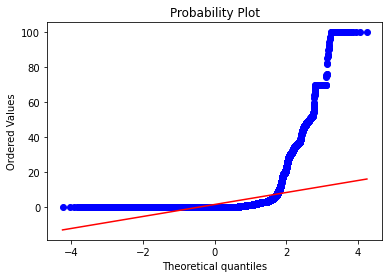

In [20]:
stats.probplot(df['[SEQ3]  Noise Band1'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([  0.,   0.,   0., ..., 100., 100., 100.])),
 (6.130119912975193, 3.232199393205789, 0.5113209879090986))

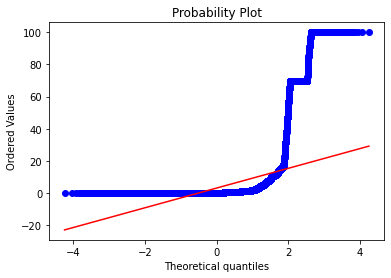

In [19]:
stats.probplot(df['[SEQ3]  Noise THD1'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 54.6, 55.5, 58.1])),
 (4.473145483204341, 4.822935406284877, 0.9059200924303462))

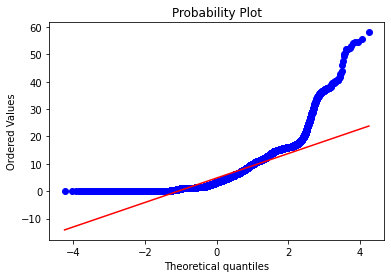

In [18]:
stats.probplot(df['[SEQ3]  Noise Touch'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 44.1, 47.2, 48. ])),
 (0.6914964302563678, 2.009472906481379, 0.6782316877760992))

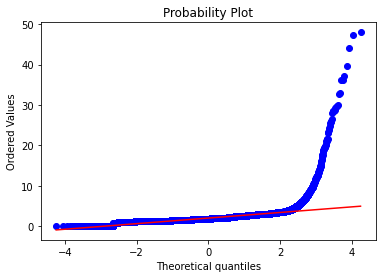

In [13]:
stats.probplot(df['[SEQ1]  Noise THD1'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 34. , 36.4, 37.8])),
 (1.3200445896962794, 0.9546727870089441, 0.7699903469507696))

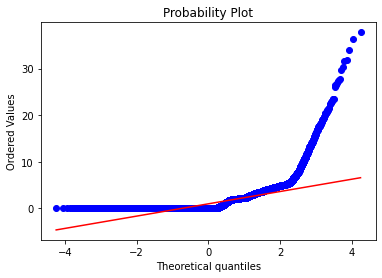

In [14]:
stats.probplot(df['[SEQ1]  Noise Band1'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 40.7, 40.8, 48. ])),
 (3.8286977476498723, 4.9494553000172905, 0.9473205980074356))

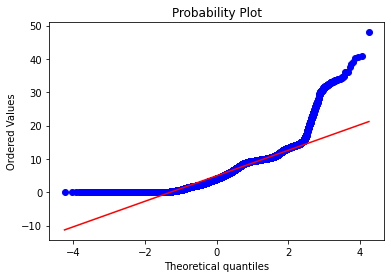

In [15]:
stats.probplot(df['[SEQ1]  Noise Touch'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([0.  , 0.  , 0.  , ..., 1.57, 1.63, 1.66])),
 (0.10284100391117634, 1.180273214594501, 0.8738807106746495))

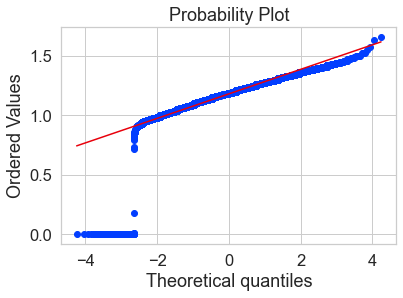

In [76]:
stats.probplot(df['[SEQ1]  F0 Vibration'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([   0. ,    0. ,    0. , ...,  182.2,  182.3, 1114.9])),
 (4.951990216789766, 163.28474525647275, 0.43193848979800076))

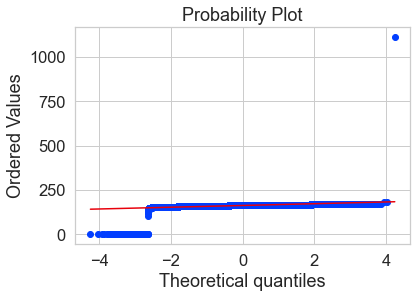

In [82]:
stats.probplot(df['[SEQ1]  F0 Current'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([  0. ,   0. ,   0. , ..., 203.9, 204.2, 211.9])),
 (40.15198560841029, 146.6980224168016, 0.679903284943646))

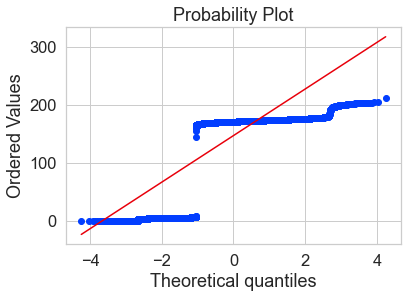

In [72]:
stats.probplot(df['[SEQ2]  F0 Frequency'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 46.4, 48.3, 52.2])),
 (5.983837613675805, 5.691903856130033, 0.6766158196989286))

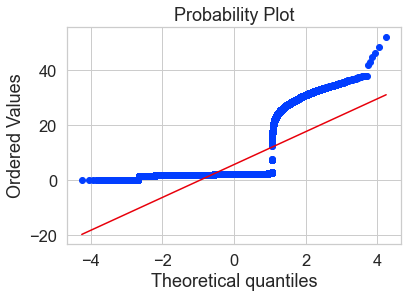

In [73]:
stats.probplot(df['[SEQ2]  F0 Vibration'], plot=plt)

((array([-4.24568658, -4.04244072, -3.93172753, ...,  3.93172753,
          4.04244072,  4.24568658]),
  array([ 0. ,  0. ,  0. , ..., 20.1, 25.5, 28.7])),
 (0.5923283295528582, 1.4688716142926759, 0.6602154116632378))

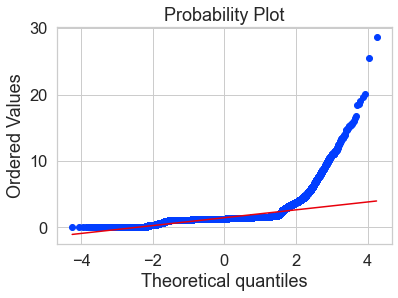

In [79]:
stats.probplot(df['[SEQ3]  F0 Vibration'], plot=plt)